In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

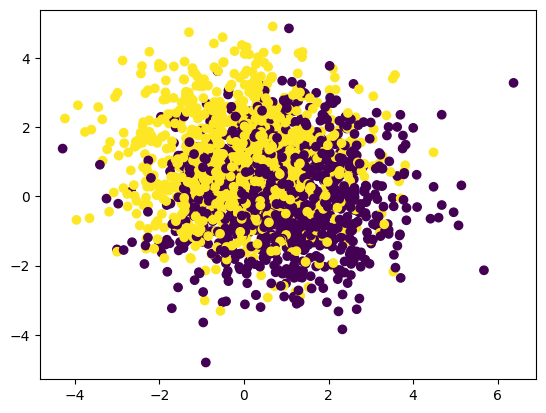

In [89]:
from scipy.stats import multivariate_normal

np.random.seed(0)

# Define mean vectors
mu1 = np.array([0,1])#.reshape(-1,1)
mu2 = np.array([1,0])#.reshape(-1,1)

# Define covariance matrix (identity matrix in this case)
cov = np.eye(2)

# Number of samples
p = 2000

# Generate samples from cluster 1
# c1_samples = multivariate_normal.rvs(mean=mu1.ravel(), cov=cov, size=p//2)

# # Generate samples from cluster 2
# c2_samples = multivariate_normal.rvs(mean=mu2.ravel(), cov=cov, size=p//2)


c1_samples = np.random.multivariate_normal([0,1], cov = [[2,0],[0,2]], size=p//2)
c2_samples = np.random.multivariate_normal([1,0], cov = [[2,0],[0,2]], size=p//2)
# c2_samples = np.random.multivariate_normal(mean=mu2, cov=cov, size=p/2)


# Assign labels
c1_labels = np.ones(p//2)
c2_labels = -np.ones(p//2)

# Combine samples and labels into one array for each cluster randomly
c1 = np.hstack((c1_samples, c1_labels.reshape(-1,1)))
c2 = np.hstack((c2_samples, c2_labels.reshape(-1,1)))

#Combine clusters randomly
data = np.vstack((c1,c2))
np.random.shuffle(data)

#plot data
plt.scatter(data[:,0], data[:,1], c=data[:,2])
plt.show()




In [90]:
data.shape

X = data[:,:2].T
y_true = data[:,2].reshape(1,-1)
W = np.linalg.inv(X@X.T )@X@y_true.T

W.shape

#predictions
y_pred = np.sign(W.T@X)

#accuracy
r_train = np.sum(y_pred == y_true)/y_true.shape[1]
print(r_train)

# #plot W and data
# plt.scatter(data[:,0], data[:,1], c=data[:,2])
# plt.plot([0, -W[1]/W[0]], [-W[1]/W[0], 0], 'r-', lw=2)
# plt.show()

#generate 1000 samples from the same distribution for testing

c1_samples_test = np.random.multivariate_normal([0,1], cov = [[2,0],[0,2]], size=1000//2)
c2_samples_test = np.random.multivariate_normal([1,0], cov = [[2,0],[0,2]], size=1000//2)

# # Assign labels
c1_labels_test = np.ones(1000//2)
c2_labels_test = -np.ones(1000//2)


#Test data

X_test = np.vstack((c1_samples_test, c2_samples_test)).T
y_test = np.hstack((c1_labels_test, c2_labels_test)).reshape(1,-1)


#predictions    
y_pred_test = np.sign(W.T@X_test)

#accuracy
r_test = np.sum(y_pred_test == y_test)/y_test.shape[1]
print(r_test)



0.6955
0.666


p =  3
Average accuracy train:  1.0
Average accuracy test:  0.58758
Average W:  [[-0.20346635]
 [ 0.6358635 ]]


p =  4
Average accuracy train:  0.9225
Average accuracy test:  0.59247
Average W:  [[-0.23475936]
 [ 0.43130544]]


p =  6
Average accuracy train:  0.8716666666666667
Average accuracy test:  0.6030666666666668
Average W:  [[-0.24434465]
 [ 0.35657959]]


p =  8
Average accuracy train:  0.851875
Average accuracy test:  0.615275
Average W:  [[-0.24291881]
 [ 0.32890999]]


p =  10
Average accuracy train:  0.8306999999999999
Average accuracy test:  0.6218440000000001
Average W:  [[-0.24232905]
 [ 0.30551196]]


p =  20
Average accuracy train:  0.8110833333333333
Average accuracy test:  0.62878
Average W:  [[-0.23556748]
 [ 0.28961848]]


p =  40
Average accuracy train:  0.7932142857142858
Average accuracy test:  0.6361914285714285
Average W:  [[-0.22891681]
 [ 0.27646282]]


p =  100
Average accuracy train:  0.7819125
Average accuracy test:  0.6425475
Average W:  [[-0.22705395]

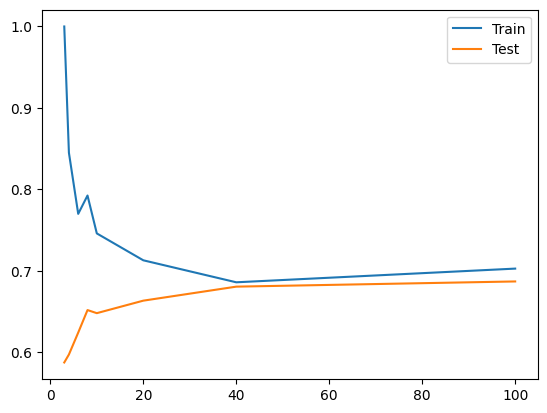

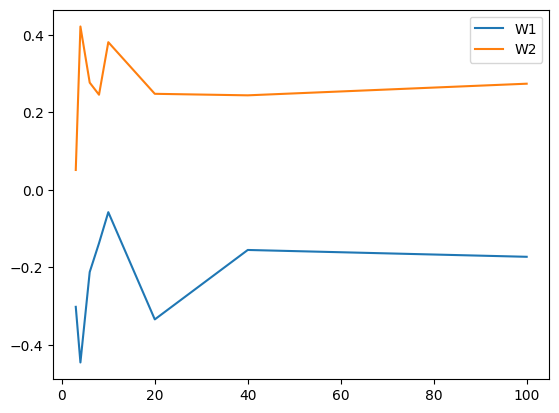

In [159]:
#repeat the steps 50 times for p=[3, 4, 6, 8, 10, 20, 40, 100] 

accuracy_test = []
accuracy_train = []
W_list = []

for p in [3, 4, 6, 8, 10, 20, 40, 100]:
    
    for i in range(50):
        #Train Data
        
        c1_samples = np.random.multivariate_normal([0,1], cov = [[2,0],[0,2]], size=p//2)
        c2_samples = np.random.multivariate_normal([1,0], cov = [[2,0],[0,2]], size=p//2)
        
        c1_labels = np.ones(p//2)
        c2_labels = -np.ones(p//2)
        
        c1 = np.hstack((c1_samples, c1_labels.reshape(-1,1)))
        c2 = np.hstack((c2_samples, c2_labels.reshape(-1,1)))
        
        data = np.vstack((c1,c2))
        np.random.shuffle(data)
        
        X = data[:,:2].T
        y_true = data[:,2].reshape(1,-1)
        W = np.linalg.inv(X@X.T)@X@y_true.T
        
        #Predictions train
        y_pred = np.sign(W.T@X)

        #accuracy train
        r_train = np.sum(y_pred == y_true)/y_true.shape[1]
        
        #generate 1000 samples from the same distribution for testing

        c1_samples_test = np.random.multivariate_normal([0,1], cov = [[2,0],[0,2]], size=1000//2)
        c2_samples_test = np.random.multivariate_normal([1,0], cov = [[2,0],[0,2]], size=1000//2)
        
        # # Assign labels
        c1_labels_test = np.ones(1000//2)
        c2_labels_test = -np.ones(1000//2)
        
        #Test data
        
        X_test = np.vstack((c1_samples_test, c2_samples_test)).T
        y_test = np.hstack((c1_labels_test, c2_labels_test)).reshape(1,-1)
        
        
        #predictions    
        y_pred_test = np.sign(W.T@X_test)
        
        #accuracy
        r_test = np.sum(y_pred_test == y_test)/y_test.shape[1]
    
        accuracy_test.append(r_test)
        accuracy_train.append(r_train)
        W_list.append(W)

    print('p = ', p)    
    print('Average accuracy train: ', np.mean(accuracy_train))
    print('Average accuracy test: ', np.mean(accuracy_test))
    print('Average W: ', np.mean(W_list, axis=0))
    print('')
    print('')
    
accuracy_train = np.array(accuracy_train)
accuracy_train = accuracy_train.reshape(8,50)
mean_accuracy_train = np.mean(accuracy_train, axis=1)
accuracy_test = np.array(accuracy_test)
accuracy_test = accuracy_test.reshape(8,50)
mean_accuracy_test = np.mean(accuracy_test, axis=1)

p=[3, 4, 6, 8, 10, 20, 40, 100] 

#plot accuracy
plt.plot(p, mean_accuracy_train, label='Train')
plt.plot(p, mean_accuracy_test, label='Test')
plt.legend()
plt.show()

#plot W
W_list = np.array(W_list)
W_list = W_list.reshape(400,2)

w1 = W_list[:,0]
w2 = W_list[:,1]


w1_mean = w1.reshape(50,8)
w1_mean = np.mean(w1_mean, axis=0)
w1_mean.shape

w2_mean = w2.reshape(50,8)
w2_mean = np.mean(w2_mean, axis=0)
w2_mean.shape

#plot the mean W for each p
plt.plot(p, w1_mean, label='W1')
plt.plot(p, w2_mean, label='W2')
plt.legend()
plt.show()
